In [1]:
# Importando as Bibliotecas necessárias para o cálculo
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Escolhendo ativos para analisar, sendo eles: Banco do Brasil e itáu
ativos= ['BBAS3.SA', 'ITSA4.SA']
pf_data = pd.DataFrame()

for a in ativos:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2015-1-1')['Adj Close']

In [3]:
# Verificando os dados
pf_data.tail()

,BBAS3.SA,ITSA4.SA
Date,,
2022-09-13,40.220001,9.37
2022-09-14,40.259998,9.36
2022-09-15,39.849998,9.35
2022-09-16,39.400002,9.28
2022-09-19,40.180000,9.56


<AxesSubplot:xlabel='Date'>

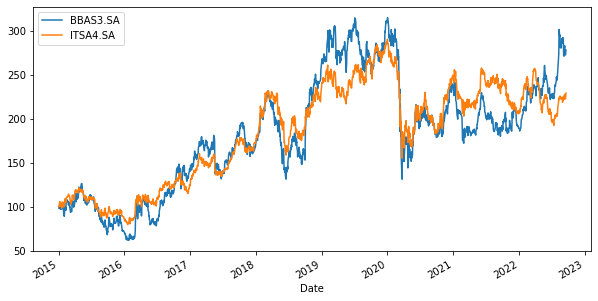

In [4]:
# Normalizando os dados para conseguir uma analise de periodo
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
# Para calcular a fronteira dos dois ativos, calculei os retornos usando log 
log_retornos = np.log(pf_data / pf_data.shift(1))

In [6]:
# Calculando a média dos ativos
log_retornos.mean() * 250

BBAS3.SA    0.133263
ITSA4.SA    0.108137
dtype: float64

In [7]:
# Calculando a covâriancia dos ativos
log_retornos.cov() * 250

,BBAS3.SA,ITSA4.SA
BBAS3.SA,0.193975,0.104021
ITSA4.SA,0.104021,0.093409


In [8]:
# E calculando a correlação dos ativos
log_retornos.corr()

,BBAS3.SA,ITSA4.SA
BBAS3.SA,1.000000,0.772776
ITSA4.SA,0.772776,1.000000


In [9]:
# Criando uma variável para contar quantos elementos existem no portifólio
num_ativos = len(ativos)

In [10]:
num_ativos

2

In [11]:
# como há 2 ativos no portifólio, cada um precisa ter pesos diferentes e então, irei fazer com que o peso dessas variáveis seja
# aleatório, mas sua soma final será igual a 1.
pesos = np.random.random(num_ativos)
pesos /= np.sum(pesos)
pesos

array([0.55296718, 0.44703282])

In [12]:
pesos[0] + pesos[1]

1.0

Calculando o retorno esperado do portifólio:

In [13]:
# '* 250' pois é o cálculo anualizado
np.sum(pesos * log_retornos.mean()) * 250

0.12203083649595305

Variação Esperada do Portfólio:

In [14]:
np.dot(pesos.T, np.dot(log_retornos.cov() * 250, pesos))

0.12940584714283024

Calculando a volatilidade esperada:

In [15]:
np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov() * 250, pesos)))

0.35973024218548855

Agora, irei simular 1000 combinações de pesos diferentes desta carteira com dois ativos, para poder comparar e ver qual dois dois é mais eficiente.


In [16]:
pfolio_retornos = []
pfolio_volatilidades = []

for x in range (1000):
    pesos = np.random.random(num_ativos)
    pesos /= np.sum(pesos)
    pfolio_retornos.append(np.sum(pesos * log_retornos.mean()) * 250)
    pfolio_volatilidades.append(np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov() * 250, pesos))))

pfolio_retornos, pfolio_volatilidades

([0.12906789034881141,
  0.11167512685323616,
  0.11728788624795124,
  0.12253143381780025,
  0.11486861489914328,
  0.11386838560302248,
  0.1254836593272696,
  0.11610683877717796,
  0.1150545144196025,
  0.11430730771364427,
  0.12337795936383558,
  0.10841602105773449,
  0.12639983496793075,
  0.1090516362925482,
  0.12095600873030571,
  0.11426301963542407,
  0.12122302580909171,
  0.11459171746230497,
  0.1272694611345328,
  0.12895912518440789,
  0.13019286532042035,
  0.12283877731032102,
  0.12117715002468066,
  0.11338734482479028,
  0.11812416522529597,
  0.11731519631491413,
  0.11109667205289493,
  0.12241649190404251,
  0.111796182600898,
  0.12909828463749307,
  0.11153245318946128,
  0.12339962645384168,
  0.12199042837601702,
  0.12408389957152847,
  0.13106185178175309,
  0.119188425265978,
  0.11756072086569622,
  0.11393112375304894,
  0.11587114269558783,
  0.12108830405283146,
  0.10900320870344954,
  0.10961882167586168,
  0.1222918320999028,
  0.1225821828628122

In [17]:
pfolio_retornos = []
pfolio_volatilidades = []

for x in range (1000):
    pesos = np.random.random(num_ativos)
    pesos /= np.sum(pesos)
    pfolio_retornos.append(np.sum(pesos * log_retornos.mean()) * 250)
    pfolio_volatilidades.append(np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov() * 250, pesos))))
    
pfolio_retornos = np.array(pfolio_retornos)
pfolio_volatilidades = np.array(pfolio_volatilidades)

pfolio_retornos, pfolio_volatilidades

(array([0.11948985, 0.12112491, 0.12206542, 0.11479285, 0.12096147,
        0.12615845, 0.12385916, 0.1309743 , 0.13091182, 0.12959282,
        0.12337118, 0.12249821, 0.12168652, 0.12675747, 0.11758676,
        0.12344992, 0.10881444, 0.12923373, 0.10954744, 0.12128361,
        0.1182618 , 0.12616237, 0.11613908, 0.12016426, 0.11596467,
        0.13152922, 0.11580813, 0.11680148, 0.11730296, 0.12825487,
        0.11930295, 0.1183817 , 0.12294519, 0.13251205, 0.1123057 ,
        0.12181385, 0.11975868, 0.13313831, 0.12344942, 0.11910283,
        0.11788086, 0.12884151, 0.13161113, 0.12515059, 0.11009259,
        0.12424397, 0.11755288, 0.12850132, 0.11406625, 0.12727439,
        0.11690502, 0.12041761, 0.13002118, 0.11210021, 0.11449753,
        0.13108736, 0.11825561, 0.11853467, 0.12179049, 0.10906856,
        0.11955971, 0.11355765, 0.1323747 , 0.13315806, 0.12126942,
        0.11803821, 0.12860292, 0.12460733, 0.13171454, 0.13233452,
        0.11828942, 0.12281478, 0.11329202, 0.12

## Após gerar essas 2 listas, irei criar um dataframe com elas e plotar para ver os resultados de eficiência de Markowitz

In [18]:
portfolios = pd.DataFrame({'Retornos': pfolio_retornos, 'Volatilidade': pfolio_volatilidades})

In [19]:
portfolios.head()

,Retornos,Volatilidade
0,0.119490,0.345249
1,0.121125,0.354373
2,0.122065,0.359939
3,0.114793,0.323416
4,0.120961,0.353428


In [20]:
portfolios.tail()

,Retornos,Volatilidade
995,0.110427,0.309842
996,0.111492,0.312500
997,0.126925,0.391970
998,0.132662,0.435571
999,0.120032,0.348193


Text(0, 0.5, 'Retorno esperado')

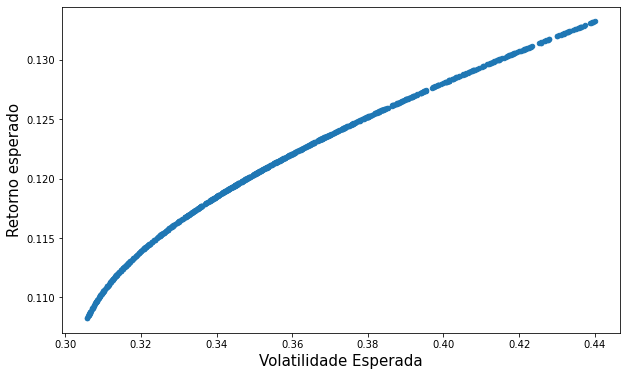

In [21]:
portfolios.plot(x='Volatilidade', y='Retornos', kind='scatter', figsize=(10, 6));
plt.xlabel('Volatilidade Esperada', fontsize = 15)
plt.ylabel('Retorno esperado', fontsize= 15)

Assim, podemos analisar qual a melhor opção na relação risco x retorno desta carteira.